In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, decomposition
import seaborn as sns
from sklearn.manifold import MDS

In [3]:
df = pd.read_csv('Final.csv')
subset_df = df[(df['EXTOLTP'].isin([0, 1])) & (df['WEAPLTP'] == 1)]
df_1 = (subset_df[['ATTVIO02', 'NHOOD06', 'SELFC09', 'NHOOD07', 'ATTVIO01', 'NHOOD05', 'ATTVIO04', 'ATSCH05', 'FRNDAC04', 'NIGHTACT', 'TRUANCY', 'ATTVIO05', 'FAMILY', 'SELFC08']]).transpose() 
df_reset = df_1.reset_index()  # Reset the index, which will create a numerical index
item_df = df_reset.rename(columns={'index': 'Features'}) 
print(item_df.shape)
item_df.head()

(14, 7443)


,Features,11,21,45,50,57,68,82,118,119,...,68404,68410,68412,68417,68429,68447,68450,68458,68468,68491
0,ATTVIO02,4,1,1,1,3,2,1,4,4,...,4,1,3,3,1,9,4,4,4,2
1,NHOOD06,2,4,2,3,4,1,2,9,4,...,1,2,1,4,1,2,4,1,4,2
2,SELFC09,2,1,2,2,2,1,2,2,2,...,4,2,2,1,3,4,2,1,2,2
3,NHOOD07,2,4,2,1,4,2,2,4,2,...,1,2,1,2,1,2,3,1,4,1
4,ATTVIO01,3,1,2,1,3,2,4,4,4,...,1,2,1,2,3,1,3,4,3,2


In [5]:
X = item_df.iloc[:,2:7443]
# X.head()

print(X.head)
pca = decomposition.PCA(n_components=2)
pca.fit(X)
PC = pca.transform(X)

<bound method NDFrame.head of     21     45     50     57     68     82     118    119    134    144    ...  \
0       1      1      1      3      2      1      4      4      9      4  ...   
1       4      2      3      4      1      2      9      4      1      4  ...   
2       1      2      2      2      1      2      2      2      1      3  ...   
3       4      2      1      4      2      2      4      2      4      3  ...   
4       1      2      1      3      2      4      4      4      2      4  ...   
5       4      2      2      4      2      2      3      1      1      3  ...   
6       1      2      2      3      1      3      4      3      3      3  ...   
7       4      2      3      4      2      2      4      4      3      3  ...   
8       2      1      2      2      1      2      2      2      1      9  ...   
9       8      8      4      8      5      8     97      3      8      5  ...   
10      2      2      1      1      1      1      3      2      1      2  ...  

In [6]:
mds = MDS(n_components=2, random_state=0)
MD = mds.fit_transform(X)

In [7]:
print(PC[:, :2])

[[ -93.8844612   -48.28715066]
 [ -96.53010129  -48.78731787]
 [ -92.10048979  -48.07827771]
 [ -91.75993306  -47.46083002]
 [ -89.09461541  -49.22635199]
 [ -90.9537554   -47.17490996]
 [ -89.4336364   -49.94765722]
 [ -82.06697961  -45.90102107]
 [-103.23962145  -49.10726622]
 [1207.97893571    8.50170723]
 [-104.72109611  -44.74766213]
 [ -81.5381048   -47.02656216]
 [-111.08867541  562.52250922]
 [ -81.56746578  -45.27920944]]


In [8]:
print(MD[:,:2])

[[   33.42270971   164.38780024]
 [  -39.37303597    17.22747007]
 [  -30.40143663   129.57530781]
 [    5.3159993      9.81522441]
 [   51.12709723   115.31854352]
 [   29.35914791    33.25877868]
 [   85.16963124   183.96483524]
 [  130.31395074    29.88149466]
 [  -22.03817427   206.69205705]
 [  368.56082909 -1152.46181011]
 [  -72.34315049    81.9267171 ]
 [  104.87355961   112.75049599]
 [ -572.08467844   -76.42755047]
 [  -71.90244902   144.09063581]]


In [9]:
df11 = item_df.iloc[0:14,0]
df1 = pd.DataFrame(df11)
df2 = pd.DataFrame(PC, columns = ['PC1','PC2'])
df3 = pd.concat([df1,df2], axis=1)
df4 = pd.DataFrame(MD, columns = ['MD1','MD2'])
df5 = pd.concat([df1,df4], axis=1)
df3.head()

,Features,PC1,PC2
0,ATTVIO02,-93.884461,-48.287151
1,NHOOD06,-96.530101,-48.787318
2,SELFC09,-92.100490,-48.078278
3,NHOOD07,-91.759933,-47.460830
4,ATTVIO01,-89.094615,-49.226352


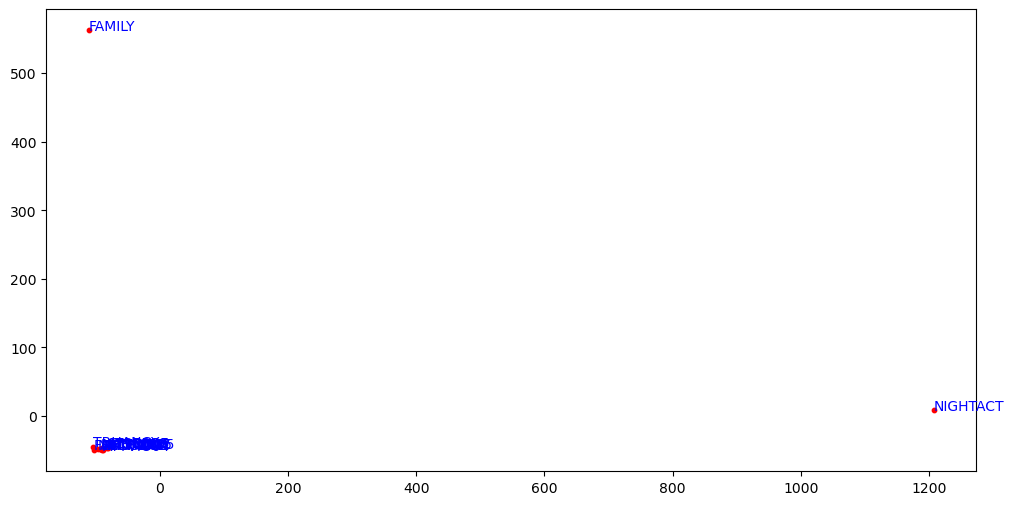

In [10]:
plt.figure(figsize=(12,6))
plt.scatter(df3['PC1'], df3['PC2'], color = 'r', s = 10)

for i in range(len(df3)): 
    row = df3.iloc[i] 
    name = row['Features'] 
    x = row['PC1'] 
    y = row['PC2'] 

    if name in row['Features']:
        plt.text(x + 0.05, y + 0.05, name, color = 'b', fontsize = 10)

plt.show()

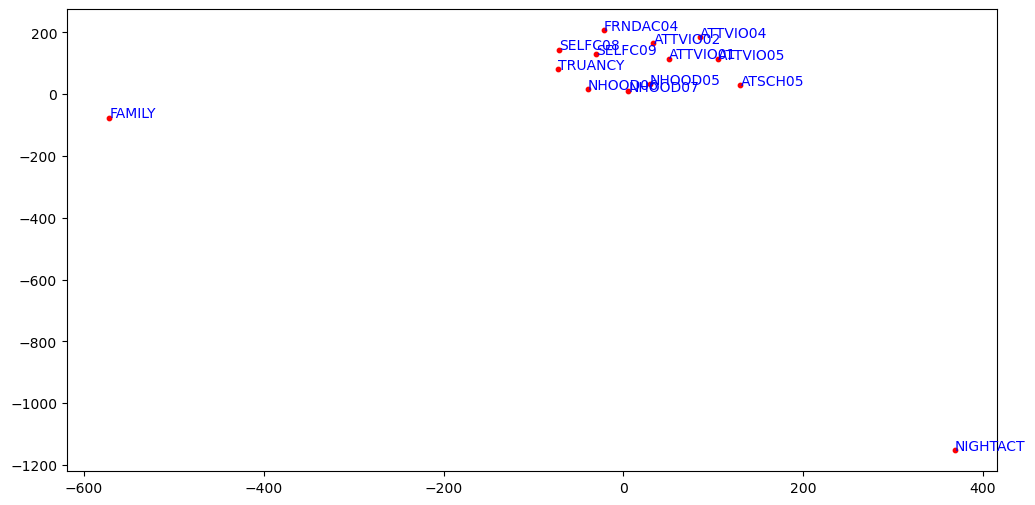

In [12]:
plt.figure(figsize=(12,6))
plt.scatter(df5['MD1'], df5['MD2'], color = 'r', s = 10)

for i in range(len(df5)): 
    row = df5.iloc[i] 
    name = row['Features'] 
    x = row['MD1'] 
    y = row['MD2'] 

    if name in row['Features']:
        plt.text(x + 0.05, y + 0.05, name, color = 'b', fontsize = 10)

plt.show()